In [0]:
import matplotlib.pyplot as plt
import numpy as np 
import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation
from data_utils import *
from keras.models import Model, load_model
from matplotlib import pyplot
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
from cifar10_solver import *
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler
import tensorflow as tf    
tf.set_random_seed(1234)
from keras import backend as k
import os
from numpy.random import seed
seed(1)
%load_ext autoreload
%autoreload 2
from ResNet import ResNet18
from keras import losses
from keras import optimizers

In [3]:
# get data
cifar10_data = CIFAR10Data()
x_train, y_train, x_test, y_test = cifar10_data.get_data(subtract_mean=True)

num_train = int(x_train.shape[0] * 0.8)
num_val = x_train.shape[0] - num_train
mask = list(range(num_train, num_train+num_val))
x_val = x_train[mask]
y_val = y_train[mask]

mask = list(range(num_train))
x_train = x_train[mask]
y_train = y_train[mask]

data = (x_train, y_train, x_val, y_val, x_test, y_test)

170500096/170498071 [==============================] - 4s 0us/step
CIFAR10 Training data shape: (50000, 32, 32, 3)
CIFAR10 Training label shape (50000, 1)
CIFAR10 Test data shape (10000, 32, 32, 3)
CIFAR10 Test label shape (10000, 1)


In [4]:
weight_decay = 1e-4
lr = 1e-1
num_classes = 10
resnet18 = ResNet18(input_shape=(32, 32, 3), classes=num_classes, weight_decay=weight_decay)
opt = optimizers.SGD(lr=lr, momentum=0.9, nesterov=False)
resnet18.compile(optimizer=opt,
                 loss=losses.categorical_crossentropy,
                 metrics=['accuracy'])
resnet18.summary()

Model: "ResNet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   1728        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 64)   256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 64)   0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

In [5]:
def lr_scheduler(epoch):
    new_lr = lr * (0.1 ** (epoch // 50))
    print('new lr:%.2e' % new_lr)
    return new_lr 

reduce_lr = LearningRateScheduler(lr_scheduler)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
#                               patience=10, min_lr=1e-6, verbose=1)

solver = CIFAR10Solver(resnet18, data)
history = solver.train(epochs=200, batch_size=128, data_augmentation=True, callbacks=[reduce_lr])

train with data augmentation
Epoch 1/200
new lr:1.00e-01
313/313 [==============================] - 45s 143ms/step - loss: 2.5885 - accuracy: 0.3165 - val_loss: 2.6379 - val_accuracy: 0.2937
Epoch 2/200
new lr:1.00e-01
313/313 [==============================] - 34s 109ms/step - loss: 1.9896 - accuracy: 0.4545 - val_loss: 2.0536 - val_accuracy: 0.4494
Epoch 3/200
new lr:1.00e-01
313/313 [==============================] - 34s 110ms/step - loss: 1.7412 - accuracy: 0.5327 - val_loss: 1.7185 - val_accuracy: 0.5421
Epoch 4/200
new lr:1.00e-01
313/313 [==============================] - 34s 110ms/step - loss: 1.5310 - accuracy: 0.6010 - val_loss: 1.5338 - val_accuracy: 0.5985
Epoch 5/200
new lr:1.00e-01
313/313 [==============================] - 34s 109ms/step - loss: 1.3494 - accuracy: 0.6605 - val_loss: 1.3506 - val_accuracy: 0.6649
Epoch 6/200
new lr:1.00e-01
313/313 [==============================] - 34s 110ms/step - loss: 1.2233 - accuracy: 0.6971 - val_loss: 1.2708 - val_accuracy: 0.6881

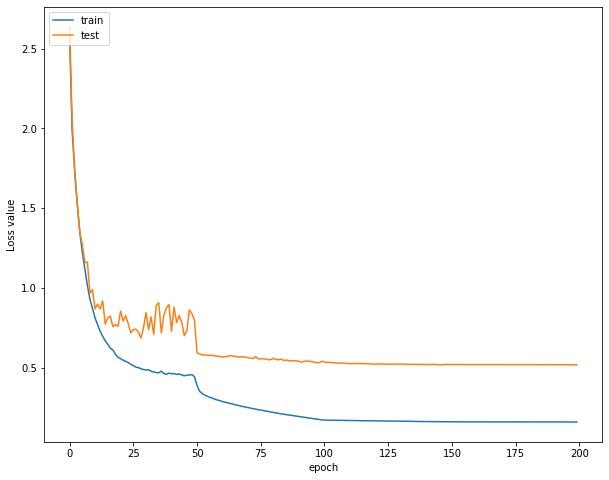

10000/10000 [==============================] - 4s 441us/step
test data loss:0.55 acc:0.9231


In [6]:
from cifar10_solver import *
# plot loss and acc 
plot_history(history)
solver.test()

In [0]:
resnet18.save("ResNet18-CIFAR10-Gaussian-Filter.h5")

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
from keras.models import Model, load_model
#model_18= load_model('ResNet18-CIFAR10.h5')
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
model_18.summary()

Model: "ResNet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   1728        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 64)   256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 64)   0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

In [0]:
# summarize feature map size for each conv layer

# load the model
model = resnet18
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

1 conv2d_1 (None, 32, 32, 64)
4 conv2d_2 (None, 32, 32, 64)
7 conv2d_3 (None, 32, 32, 64)
11 conv2d_4 (None, 32, 32, 64)
14 conv2d_5 (None, 32, 32, 64)
18 conv2d_7 (None, 16, 16, 128)
21 conv2d_6 (None, 16, 16, 128)
22 conv2d_8 (None, 16, 16, 128)
27 conv2d_9 (None, 16, 16, 128)
30 conv2d_10 (None, 16, 16, 128)
34 conv2d_12 (None, 8, 8, 256)
37 conv2d_11 (None, 8, 8, 256)
38 conv2d_13 (None, 8, 8, 256)
43 conv2d_14 (None, 8, 8, 256)
46 conv2d_15 (None, 8, 8, 256)
50 conv2d_17 (None, 4, 4, 512)
53 conv2d_16 (None, 4, 4, 512)
54 conv2d_18 (None, 4, 4, 512)
59 conv2d_19 (None, 4, 4, 512)
62 conv2d_20 (None, 4, 4, 512)


In [0]:
# summarize feature map size for each conv layer

# load the model
model = resnet18
# summarize feature map shapes
for i in range(len(model.layers)):
  layer = model.layers[i]
  # check for convolutional layer
  if 'conv' not in layer.name:
    continue
  # summarize output shape
  print(layer.get_weights())



[array([[[[-2.74350904e-02, -1.02100603e-01, -1.30211534e-02, ...,
           1.66030191e-02, -9.24644321e-02, -7.25778658e-03],
         [-7.18565509e-02, -1.15237281e-01,  1.46358027e-04, ...,
           6.77719945e-03, -1.71656460e-01,  2.18534786e-02],
         [-1.15794716e-02, -4.62836027e-02, -3.42723690e-02, ...,
          -5.06348237e-02,  1.94638848e-01,  1.22422427e-02]],

        [[-2.12089941e-02, -7.44759068e-02, -1.11258682e-02, ...,
           5.25321029e-02,  1.22233547e-01, -8.40072241e-03],
         [-5.77837452e-02, -9.84523743e-02, -1.62488059e-03, ...,
           5.36115952e-02, -3.81575346e-01,  6.39143772e-03],
         [ 1.53054390e-02,  5.23750531e-03, -2.89863739e-02, ...,
          -3.03704990e-03,  1.89514473e-01, -1.29774902e-02]],

        [[-7.56057911e-03, -1.30836908e-02, -2.22055502e-02, ...,
           2.24483144e-02, -9.13864747e-02,  2.01417804e-02],
         [-6.67421371e-02, -6.18401058e-02, -4.59332066e-03, ...,
           4.06397283e-02, -3.090

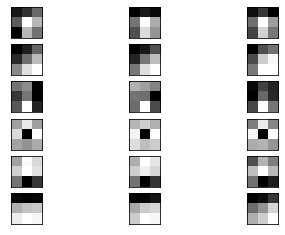

In [0]:
#Retrive weigths from the second hidden layer
filters= np.array(model.layers[1].get_weights())
q=np.reshape(filters, (3,3,3,64))
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = q[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [0]:
(a_train, b_train), (a_test, b_test) = cifar10.load_data()

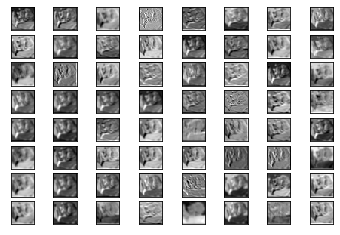

In [0]:
model = Model(inputs=resnet18.inputs, outputs=resnet18.layers[1].output)
# convert the image to an array
w=np.reshape(a_test[0],(1,32,32,3))
feature_maps = model.predict(w)
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1])
		ix += 1
# show the figure
pyplot.show()
#Output of the first CNN layer

(3, 3, 3, 64)


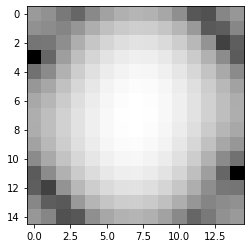

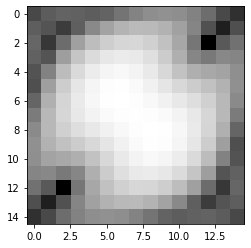

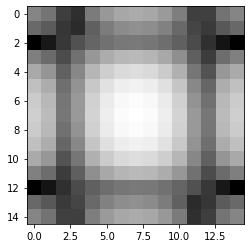

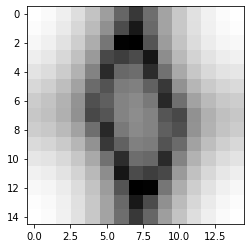

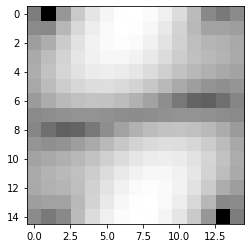

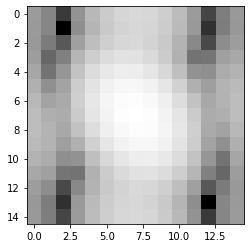

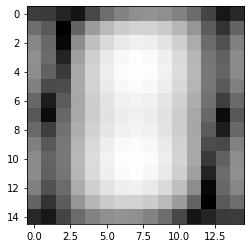

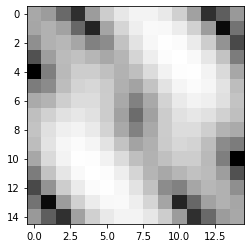

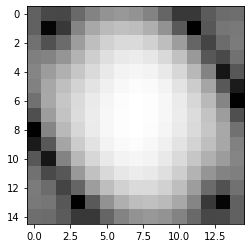

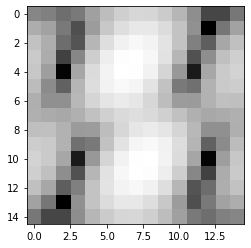

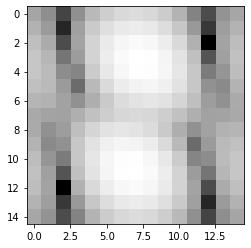

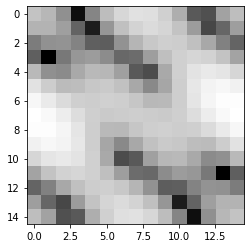

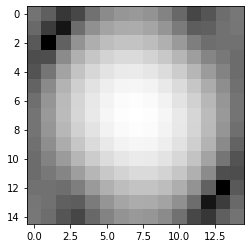

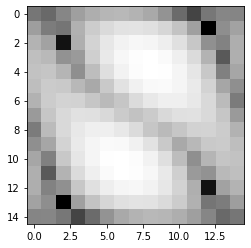

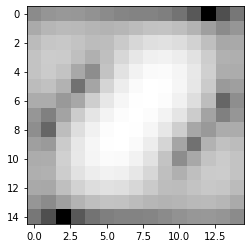

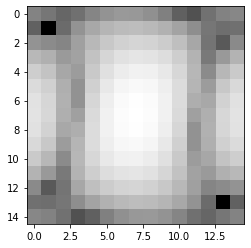

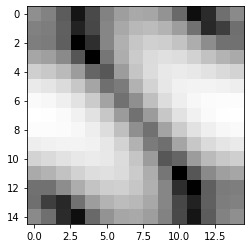

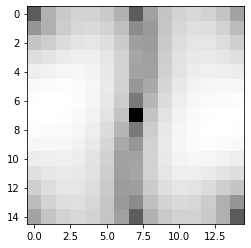

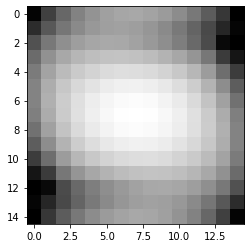

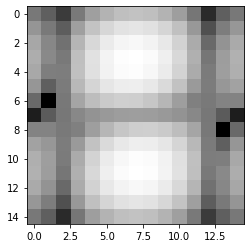

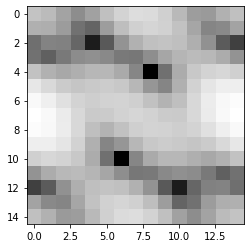

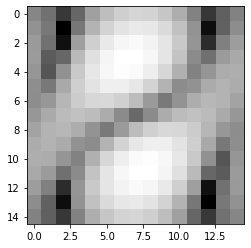

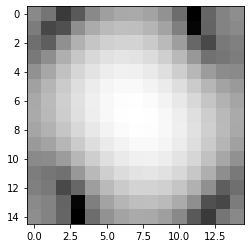

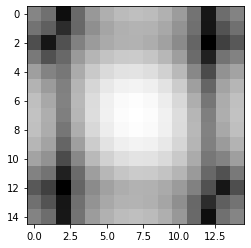

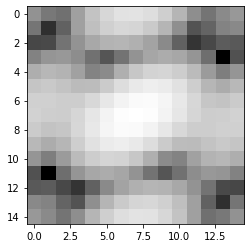

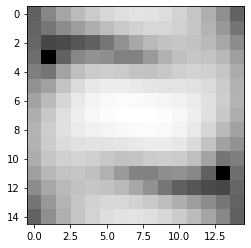

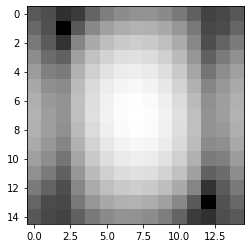

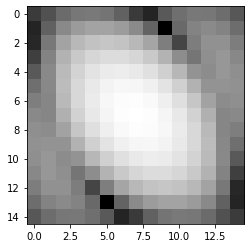

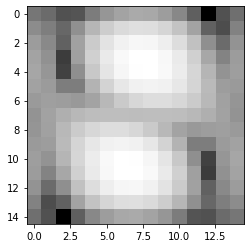

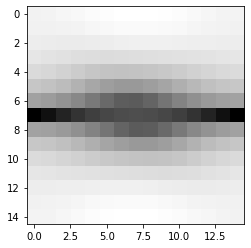

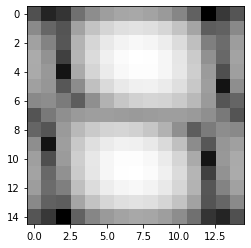

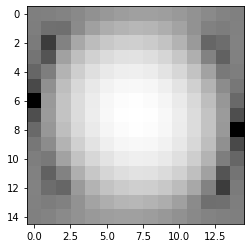

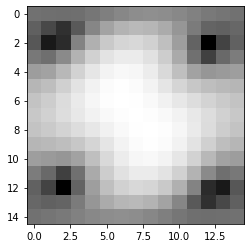

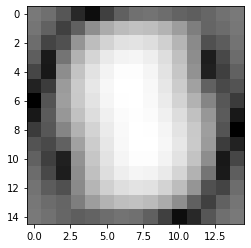

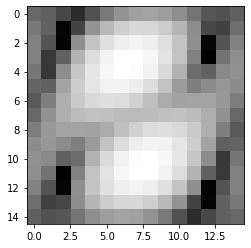

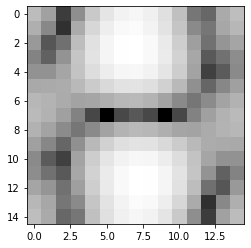

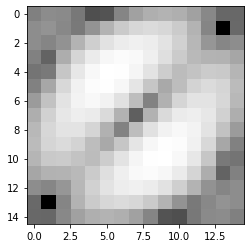

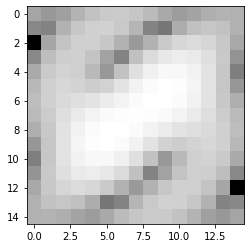

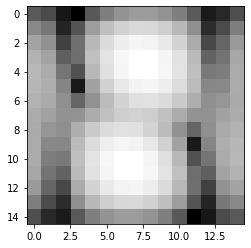

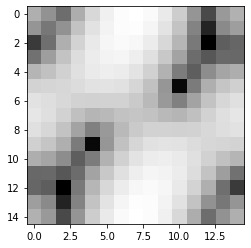

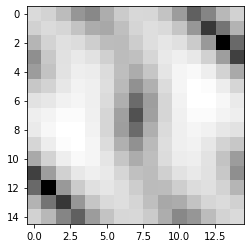

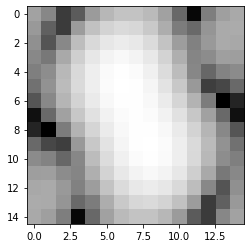

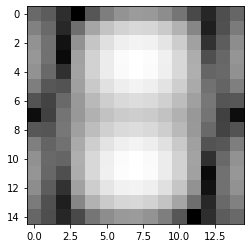

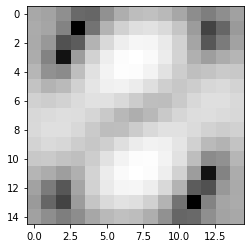

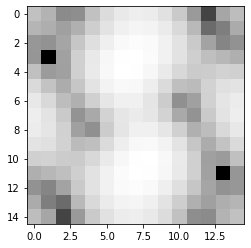

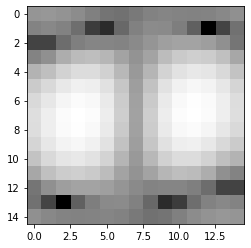

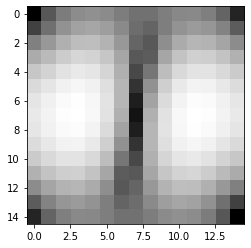

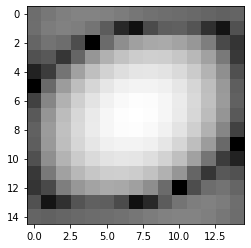

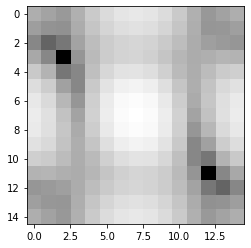

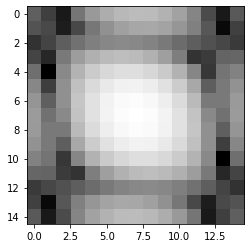

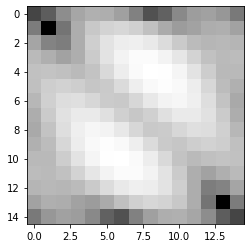

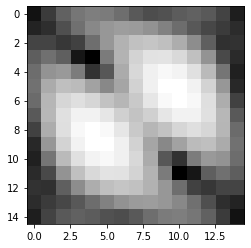

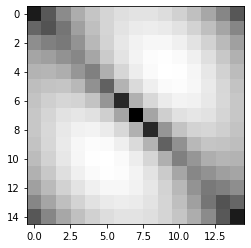

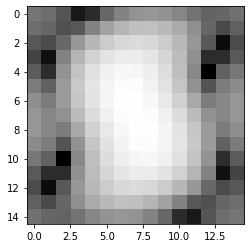

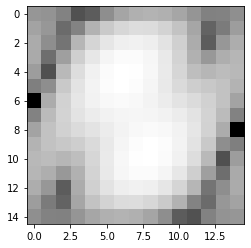

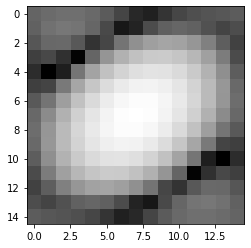

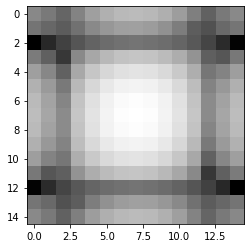

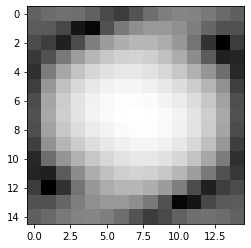

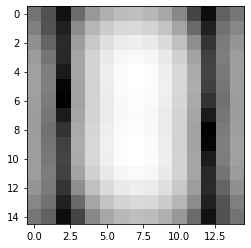

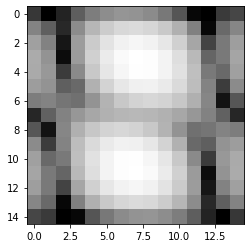

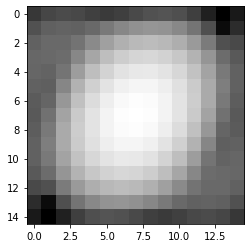

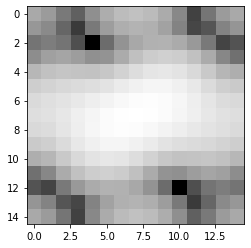

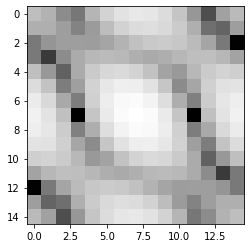

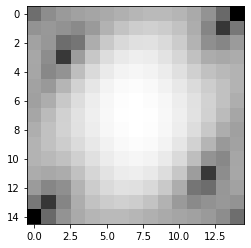

In [0]:
#np.pad(a, 6, pad_with, padder=0)
filters= np.array(model.layers[1].get_weights())
f=np.reshape(filters,(3,3,3,64))
filters=f
print(filters.shape)
#Taking only first channel
#Each channel has 16 filters and each filter is 3X3 with 3 channels
for t in range(64):
    for j in range(filters.shape[2]):
      z=filters[:,:,j,t]
      for j in range(2):
        q=np.reshape(z, (3,3))
        #op=np.pad(q, 6, pad_with, padder=0)
        x = np.pad(q, pad_width=6, mode='constant', constant_values=0)
        a=np.fft.fftshift(np.abs(np.fft.fft2(x))**2)
        pyplot.imshow(np.log(a))
    pyplot.show()